#Carregando diretório de imagem

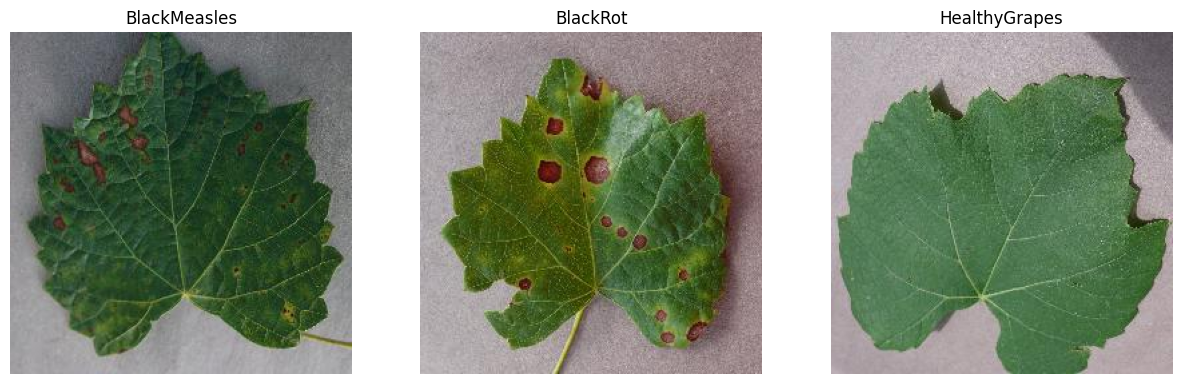

In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Diretórios das subpastas
subfolders = {
    "BlackMeasles": "/kaggle/input/uvas-0/uvas/BlackMeasles",
    "BlackRot": "/kaggle/input/uvas-0/uvas/BlackRot",
    "HealthyGrapes": "/kaggle/input/uvas-0/uvas/HealthyGrapes"
}

# Carregar e mostrar uma imagem aleatória de cada subpasta
fig, axs = plt.subplots(1, len(subfolders), figsize=(15, 5))
for i, (label, folder) in enumerate(subfolders.items()):
    # Selecionar uma imagem aleatória
    img_name = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, img_name)
    
    # Carregar a imagem
    img = Image.open(img_path)
    
    # Mostrar a imagem
    axs[i].imshow(img)
    axs[i].set_title(label)
    axs[i].axis('off')

plt.show()

#Explorando e visualizando dados

- Os primeiros dois numeros são as dimensões em pixels da imagem, o terceiro número é o número de canais da imagem.

- Três canais de cores é como se fossem 3 matrizes para formar imagens (coloridas)

In [4]:
import torch

# Verificar se a GPU está disponível
if torch.cuda.is_available():
    print("GPU está disponível. Utilizando a GPU.")
else:
    print("GPU não está disponível. Utilizando a CPU.")

GPU está disponível. Utilizando a GPU.


In [5]:
import numpy as np
from PIL import Image
import os

# Diretório principal das imagens
data_dir = "/kaggle/input/uvas-0/uvas"

# Diretórios das subpastas
subfolders = {
    "BlackMeasles": os.path.join(data_dir, "BlackMeasles"),
    "BlackRot": os.path.join(data_dir, "BlackRot"),
    "HealthyGrapes": os.path.join(data_dir, "HealthyGrapes")
}

# Verificando quantas imagens cada classe tem e as dimensões de uma imagem de exemplo
for subfolder, path in subfolders.items():
    # Listar todas as imagens com extensão .JPG na subpasta
    images = [img for img in os.listdir(path) if img.endswith('.JPG')]
    
    # Exibir o número de imagens na subpasta
    print(f'Classe {subfolder} tem {len(images)} imagens')
    
    # Verificar a dimensão da primeira imagem
    if images:
        img = Image.open(os.path.join(path, images[0]))  # primeira imagem de cada pasta
        img_array = np.array(img)
        print(f'Dimensão da imagem em {subfolder}: {img_array.shape}')


Classe BlackMeasles tem 400 imagens
Dimensão da imagem em BlackMeasles: (256, 256, 3)
Classe BlackRot tem 400 imagens
Dimensão da imagem em BlackRot: (256, 256, 3)
Classe HealthyGrapes tem 400 imagens
Dimensão da imagem em HealthyGrapes: (256, 256, 3)


##Caregamento das imagens no tensorflow em batchs



- Não estamos carregando o dataset e sim passando as informações de como carregar o dataset

In [6]:
import tensorflow as tf



batch_size = 64

altura = 255

largura = 256



treino = tf.keras.utils.image_dataset_from_directory(

    data_dir,

    validation_split=0.2, #testesize

    subset='training',

    seed=568,

    image_size=(altura, largura),

    batch_size=batch_size

)

Found 1200 files belonging to 3 classes.
Using 960 files for training.


In [7]:
validacao = tf.keras.utils.image_dataset_from_directory(

    data_dir,

    validation_split=0.2, #testesize

    subset='validation',

    seed=568,

    image_size=(altura, largura),

    batch_size=batch_size

)

Found 1200 files belonging to 3 classes.
Using 240 files for validation.


#Estrutura e treinamento da rede neural

In [8]:
#Definindo seed para reprozir resultados parecidos

tf.random.set_seed(42)



modelo = tf.keras.models.Sequential([

    tf.keras.layers.Input(shape=(255, 256, 3)),

    tf.keras.layers.Rescaling(1./255), #reescalando

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation=tf.nn.relu),

    tf.keras.layers.Dense(4, activation=tf.nn.softmax)

])



modelo.compile(

  optimizer = tf.keras.optimizers.Adam(),

  loss = 'sparse_categorical_crossentropy',

  metrics = ['accuracy']

)

###Utilizando a GPU do colab

In [9]:
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':

  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [10]:
epocas =10



history = modelo.fit(

    treino,

    validation_data=validacao,

    epochs=epocas

)

Epoch 1/10


I0000 00:00:1730834617.372394    2468 service.cc:145] XLA service 0x7af4440100f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730834617.372449    2468 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730834617.372454    2468 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 7/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2703 - loss: 85.8070

I0000 00:00:1730834618.444213    2468 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.2972 - loss: 80.8713 - val_accuracy: 0.3000 - val_loss: 25.9795
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4219 - loss: 29.4102 - val_accuracy: 0.3625 - val_loss: 20.7728
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4544 - loss: 14.7068 - val_accuracy: 0.5375 - val_loss: 9.6823
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5392 - loss: 11.0114 - val_accuracy: 0.6583 - val_loss: 8.8637
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6549 - loss: 6.8317 - val_accuracy: 0.6083 - val_loss: 6.5980
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7179 - loss: 4.5410 - val_accuracy: 0.7292 - val_loss: 3.3144
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7358 - loss: 3.6331 - val_accuracy: 0.6667 - val_loss: 4.2572
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7165 - loss: 3.4240 - val_accuracy: 0.6667 - val_lo

In [11]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 255, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 195840)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,067,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,204,494 (286.88 MB)

 Trainable params: 25,068,164 (95.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,136,330 (191.25 MB)

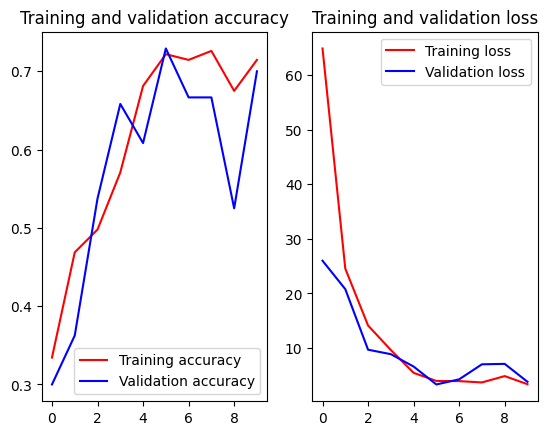

In [12]:
import matplotlib.pyplot as plt



def plota_resultados(history, epocas):

  acc = history.history['accuracy']

  loss = history.history['loss']

  val_loss = history.history['val_loss']

  val_acc = history.history['val_accuracy']



  intervalo_epocas = range(epocas)



  plt.subplot(1,2,1)

  plt.plot(intervalo_epocas, acc, 'r', label='Training accuracy')

  plt.plot(intervalo_epocas, val_acc, 'b', label='Validation accuracy')

  plt.title('Training and validation accuracy')

  plt.legend(loc='lower right')



  plt.subplot(1,2,2)

  plt.plot(intervalo_epocas, loss, 'r', label='Training loss')

  plt.plot(intervalo_epocas, val_loss, 'b', label='Validation loss')

  plt.title('Training and validation loss')

  plt.legend(loc='upper right')



  plt.show()



plota_resultados(history, epocas)

#Adicionando camadas convolucionais

###Estrututando uma rede convolucional

- Adicionando camadas após o processo de reecaling a antes do flatten

- **tf.keras.layers.Conv2D:** é uma camada usada em redes neurais convolucionais (CNNs) para realizar operações de convolução em dados bidimensionais, como imagens. Essa camada aplica filtros (ou kernels) deslizantes sobre a entrada, que podem ser uma imagem ou a saída de outra camada convolucional, para extrair características relevantes, como bordas, texturas, e padrões complexos

- **tf.keras.layers.Maxpooling2D:** funciona aplicando um filtro sobre a imagem de entrada e, em cada região filtrada, seleciona o valor máximo. Isso ajuda a reduzir a quantidade de parâmetros, aumentar a eficiência computacional e minimizar o risco de overfitting, mantendo as informações mais relevantes da imagem.

In [13]:
modelo = tf.keras.models.Sequential([

    tf.keras.layers.Input(shape=(255, 256, 3)),

    tf.keras.layers.Rescaling(1./255),#reescalando

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation=tf.nn.relu),

    tf.keras.layers.Dense(4, activation=tf.nn.softmax)

])



modelo.compile(

  optimizer = tf.keras.optimizers.Adam(),

  loss = 'sparse_categorical_crossentropy',

  metrics = ['accuracy']

)

In [14]:
epocas = 10



history = modelo.fit(

    treino,

    validation_data=validacao,

    epochs=epocas

)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.3501 - loss: 8.4315 - val_accuracy: 0.3417 - val_loss: 1.0785
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.3760 - loss: 1.0082 - val_accuracy: 0.8208 - val_loss: 0.5371
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8921 - loss: 0.3887 - val_accuracy: 0.9417 - val_loss: 0.2196
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9576 - loss: 0.1487 - val_accuracy: 0.9333 - val_loss: 0.1956
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9787 - loss: 0.0762 - val_accuracy: 0.9375 - val_loss: 0.1611
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9938 - loss: 0.0351 - val_accuracy: 0.9500 - val_loss: 0.1536
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 0.0282 - val_accuracy: 0.9542 - val_loss: 0.1416
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9625 -

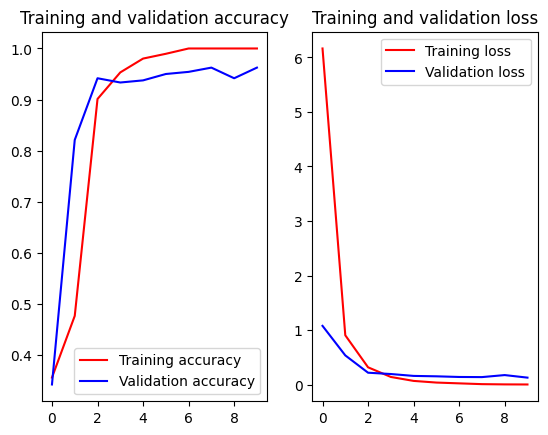

In [15]:
plota_resultados(history, epocas)

- Modelo muito ajustado aos dados de treinamento, o que pode dificultar na generalização, precisamos de acrescentar um critério de parada no treinamento para que o modelo se adeque menos aos dados de treinamento

In [16]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 255, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 253, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

##Early Stopping


In [17]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy')>=0.93): #quando a acuracia for maior que 93% o modelo para

      print("\n Alcançamos 93% de acurácia. Parando treinamento")

      self.model.stop_training = True



callbacks = myCallback()

In [18]:
modelo = tf.keras.models.Sequential([

    tf.keras.layers.Input(shape=(255, 256, 3)),

    tf.keras.layers.Rescaling(1./255),#reescalando

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation=tf.nn.relu),

    tf.keras.layers.Dense(4, activation=tf.nn.softmax)

])



modelo.compile(

  optimizer = tf.keras.optimizers.Adam(),

  loss = 'sparse_categorical_crossentropy',

  metrics = ['accuracy']

)

###Fit do modelo com o Callback definido

In [19]:
epocas = 10



history = modelo.fit(

    treino,

    validation_data=validacao,

    epochs=epocas,

    callbacks=[callbacks]

)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.3676 - loss: 5.9857 - val_accuracy: 0.3667 - val_loss: 1.0102
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5719 - loss: 0.8579 - val_accuracy: 0.8250 - val_loss: 0.3712
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8759 - loss: 0.3064 - val_accuracy: 0.9250 - val_loss: 0.2015
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9267 - loss: 0.2005
 Alcançamos 93% de acurácia. Parando treinamento
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9277 - loss: 0.1985 - val_accuracy: 0.9250 - val_loss: 0.2061


In [20]:
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 255, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 253, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 126, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 124, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

#Aumentando a diversidade do Dataset

###Realizando treinamento cru da rede antes do Data augmentation

In [21]:
modelo = tf.keras.models.Sequential([

    tf.keras.layers.Input(shape=(255, 256, 3)),

    tf.keras.layers.Rescaling(1./255),#reescalando

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation=tf.nn.relu),

    tf.keras.layers.Dense(4, activation=tf.nn.softmax)

])



modelo.compile(

  optimizer = tf.keras.optimizers.Adam(),

  loss = 'sparse_categorical_crossentropy',

  metrics = ['accuracy']

)

In [22]:
epocas = 50



history = modelo.fit(

    treino,

    validation_data=validacao,

    epochs=epocas

)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.3704 - loss: 5.0130 - val_accuracy: 0.3000 - val_loss: 1.2507
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3817 - loss: 1.0883 - val_accuracy: 0.8500 - val_loss: 0.5479
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8282 - loss: 0.5147 - val_accuracy: 0.8292 - val_loss: 0.3965
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8421 - loss: 0.3555 - val_accuracy: 0.8833 - val_loss: 0.2836
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9439 - loss: 0.1723 - val_accuracy: 0.9458 - val_loss: 0.1695
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9674 - loss: 0.1136 - val_accuracy: 0.9292 - val_loss: 0.1889
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9674 - loss: 0.0939 - val_accuracy: 0.9333 - val_loss: 0.1980
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9786 - loss: 0.0704 - val_accuracy: 0.9333 - 

- Treinamento de estabiliza e validação também gerando overfiting

- Agora temos que aplicar a técnica para auemntar a nossa base de dados para adicionar mais variabilidades no nossos dados

##Data Augmentation

In [23]:
data_augmentation = tf.keras.Sequential([

    tf.keras.layers.RandomFlip('horizontal'),

    tf.keras.layers.RandomRotation(0.05),

    tf.keras.layers.RandomZoom(0.05)

])

###Adicionando Data augmentation a estrutura da rede

In [24]:
modelo = tf.keras.models.Sequential([

    tf.keras.layers.Input(shape=(255, 256, 3)),

    #data augmentatiom

    data_augmentation,

    tf.keras.layers.Rescaling(1./255),#reescalando

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation=tf.nn.relu),

    tf.keras.layers.Dense(4, activation=tf.nn.softmax)

])



modelo.compile(

  optimizer = tf.keras.optimizers.Adam(),

  loss = 'sparse_categorical_crossentropy',

  metrics = ['accuracy']

)

In [25]:
epocas = 50



history = modelo.fit(

    treino,

    validation_data=validacao,

    epochs=epocas

)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.3581 - loss: 4.7440 - val_accuracy: 0.3708 - val_loss: 0.9836
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5817 - loss: 0.7948 - val_accuracy: 0.8333 - val_loss: 0.4396
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8393 - loss: 0.3663 - val_accuracy: 0.9375 - val_loss: 0.2066
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9129 - loss: 0.2396 - val_accuracy: 0.9208 - val_loss: 0.2202
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9312 - loss: 0.1973 - val_accuracy: 0.9375 - val_loss: 0.1263
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.8907 - loss: 0.2354 - val_accuracy: 0.9542 - val_loss: 0.1418
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.9327 - loss: 0.1752 - val_accuracy: 0.9500 - val_loss: 0.1573
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9480 - loss: 0.1380 - val_accuracy: 0.

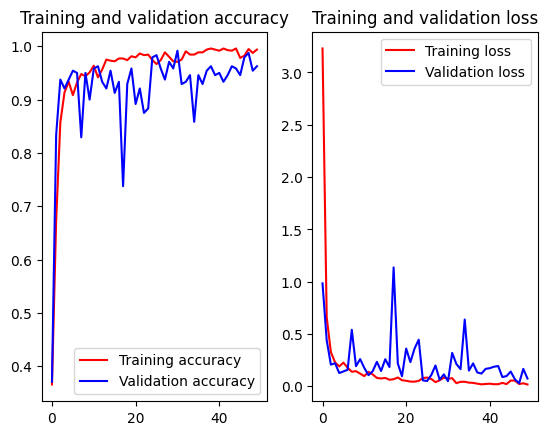

In [26]:
plota_resultados(history, epocas)

- Modelo está um pouco instável nos dados de validação, está bom mas pode ser melhorado

In [27]:
modelo.save('modelo_apos_aumento.keras')

##Usando modelos pré treinados



- O ImageNet é um grande banco de dados de imagens organizado de acordo com a hierarquia de conceitos do WordNet. No contexto do TensorFlow, ele é utilizado principalmente para treinar e avaliar modelos de deep learning, especialmente em tarefas de classificação de imagens.

- O TensorFlow oferece acesso a esse modelo treinado através de API.

- Esses modelos foram treinados com milhões de imagens do ImageNet.

In [28]:
input_shape = (255, 256, 3)

modelo_base = tf.keras.applications.InceptionV3(

    input_shape=input_shape,

    include_top=False,

    weights='imagenet'

)

In [29]:
#Para não treinar o modelo

modelo_base.treinable = False

modelo_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 255, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 62, 62,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

#Transfere Learning

##Conectando esse modelo treinado para treinar com o nosso caso das folhas

In [30]:
#rescalando os dados

rescale = tf.keras.layers.Rescaling(1./255)

#retreinando

treino = treino.map(lambda x,y: (rescale(x),y))

validacao = validacao.map(lambda x,y: (rescale(x),y))

###Travando o inceptionV3

- precisamos travar a última camada do inceptionV3

- poederiamos escolher as últimas camadas, como a mixed9 ou mixed8, mas vamos travar a mixed7 para que o modelo não fique muito grande

In [31]:
ultima_camada = modelo_base.get_layer('mixed7')

print('ultima_camada', ultima_camada.output.shape)

ultima_saida = ultima_camada.output

ultima_camada (None, 14, 14, 768)


- Ultima camada com esse tamanho

- Precisamos passar a última saída desse modelo para conectar  ao modelo que iremos construir

##Construindo o modelo

- Pegando como entrada o modelo_base que é inceptionV3 e o modelo de saída é a nosa sequência de camadas que vamos criar

In [32]:
x = tf.keras.layers.Flatten()(ultima_saida)



x = tf.keras.layers.Dense(1024, activation='relu')(x)



x = tf.keras.layers.Dropout(0.2)(x)



x = tf.keras.layers.Dense(4, activation='softmax')(x)



modelo = tf.keras.models.Model(inputs=modelo_base.input, outputs=x)

In [33]:
modelo.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 255, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 62, 62,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 163,121,060 (622.26 MB)

 Trainable params: 163,102,244 (622.19 MB)

 Non-trainable params: 18,816 (73.50 KB)

- agora temos uma camada densa de saida com 4 neuronios

- temos a camada densa que adicionamos

- temos a camada do droput



- Isso significa que nós conectamos esse pequeno modelo com parâmetros treináveis ao final do modelo inceptionV3

In [34]:
modelo.compile(

    optimizer = tf.keras.optimizers.Adam(),

    loss = 'sparse_categorical_crossentropy',

    metrics = ['accuracy']

)

In [35]:
epocas = 20



history = modelo.fit(

    treino,

    validation_data=validacao,

    epochs=epocas

)

Epoch 1/20


I0000 00:00:1730834889.423422    2468 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 32 bytes spill stores, 32 bytes spill loads



15/15 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3458 - loss: 10.1554 - val_accuracy: 0.3583 - val_loss: 11546.3291
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 588ms/step - accuracy: 0.9364 - loss: 0.2031 - val_accuracy: 0.3583 - val_loss: 4211.9937
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 588ms/step - accuracy: 0.9832 - loss: 0.0730 - val_accuracy: 0.3583 - val_loss: 1689.2125
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 584ms/step - accuracy: 0.9909 - loss: 0.0334 - val_accuracy: 0.3583 - val_loss: 428.1861
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 577ms/step - accuracy: 0.9993 - loss: 0.0054 - val_accuracy: 0.4833 - val_loss: 61.5342
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 568ms/step - accuracy: 0.9986 - loss: 0.0058 - val_accuracy: 0.6667 - val_loss: 13.8896
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 567ms/step - accuracy: 1.0000 - loss: 7.7523e-04 - val_accuracy: 0.8333 - val_loss: 3.1372
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 568ms/step - accuracy: 1.0000 - loss: 7.3086e-04 - val_ac

# DC GAN

In [68]:
import torch

# Verificar se a GPU está disponível
if torch.cuda.is_available():
    print("GPU está disponível. Utilizando a GPU.")
else:
    print("GPU não está disponível. Utilizando a CPU.")

GPU está disponível. Utilizando a GPU.


In [39]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Diretório principal das imagens
data_dir = "/kaggle/input/uvas-0/uvas"

# Transformação para converter RGB para escala de cinza
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Converte para escala de cinza
    transforms.ToTensor()  # Converte para tensor
])

# Definindo uma classe Dataset personalizada
class UvaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        
        # Percorrendo subpastas e adicionando os caminhos das imagens e os rótulos
        for subfolder in ["BlackMeasles", "BlackRot", "HealthyGrapes"]:
            subfolder_path = os.path.join(root_dir, subfolder)
            self.image_paths += [os.path.join(subfolder_path, img) for img in os.listdir(subfolder_path) if img.endswith('.JPG')]
            self.labels += [subfolder] * len([img for img in os.listdir(subfolder_path) if img.endswith('.JPG')])
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path)
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

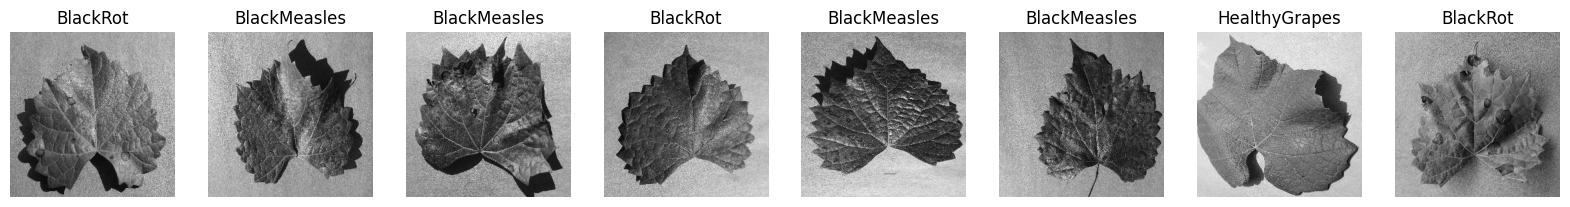

In [40]:
# Criando o dataset e o DataLoader
uva_dataset = UvaDataset(data_dir, transform=transform)
uva_loader = DataLoader(uva_dataset, batch_size=8, shuffle=True)

# Exibindo algumas imagens convertidas para escala de cinza com seus rótulos
data_iter = iter(uva_loader)
images, labels = next(data_iter)

# Plotando as imagens e seus rótulos
fig, axs = plt.subplots(1, 8, figsize=(20, 5))
for i in range(8):
    axs[i].imshow(images[i].squeeze(), cmap='gray')
    axs[i].set_title(labels[i])
    axs[i].axis('off')

plt.show()

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

#### Convertendo para escala de preto e branco e redimensinando imagem para 64x64

In [98]:
class UvaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        
        # Carregar imagens de todas as subpastas
        for subfolder in ["BlackMeasles", "BlackRot", "HealthyGrapes"]:
            subfolder_path = os.path.join(root_dir, subfolder)
            self.image_paths += [os.path.join(subfolder_path, img) for img in os.listdir(subfolder_path) if img.endswith('.JPG')]
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        
        if self.transform:
            image = self.transform(image)
        
        return image

# Transformações
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Dataset e DataLoader
data_dir = "/kaggle/input/uvas-0/uvas"
dataset = UvaDataset(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)


In [119]:
# Configurações e hiperparâmetros
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim = 100  # Reduzido para melhor estabilidade
image_size = 64
batch_size = 32  # Reduzido para melhor estabilidade
num_epochs = 100  # Aumentado para melhor convergência
learning_rate = 0.0001  # Reduzido para maior estabilidade

In [116]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.main = nn.Sequential(
            # Camada inicial
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            
            # 4x4 -> 8x8
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            
            # 8x8 -> 16x16
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            
            # 16x16 -> 32x32
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            
            # 32x32 -> 64x64
            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.main(z.view(-1, self.latent_dim, 1, 1)) #Processa o ruído de entrada para gerar imagens

In [117]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # 64x64 -> 32x32
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            
            # 32x32 -> 16x16
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            
            # 16x16 -> 8x8
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            
            # 8x8 -> 4x4
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            
            # 4x4 -> 1x1
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid() # Normaliza saída para [0, 1] (probabilidade)
        )

    def forward(self, x):
        return self.main(x).view(-1, 1).squeeze(1) #Classifica as imagens de entrada

In [120]:
# # Inicialização dos modelos e movimento para GPU/CPU apropriado
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Otimizadores
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

# Função de perda para treinamento
criterion = nn.BCELoss()

# Labels para treinamento (com label smoothing para maior estabilidade)
real_label = 0.9  # Label smoothing
fake_label = 0.0

# Loop de treinamento
for epoch in range(num_epochs):
    for i, real_imgs in enumerate(dataloader):
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)
        
        # Prepara os labels para esta batch
        real_targets = torch.full((batch_size,), real_label, device=device)
        fake_targets = torch.full((batch_size,), fake_label, device=device)
        
        # Treinar Discriminador
        discriminator.zero_grad()
        # Treina com imagens reais
        output_real = discriminator(real_imgs)
        d_loss_real = criterion(output_real, real_targets)
        
        # Gerar imagens falsas
        noise = torch.randn(batch_size, generator.latent_dim, 1, 1, device=device)
        fake_imgs = generator(noise)
        output_fake = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(output_fake, fake_targets)
        
        # # Calcula e aplica gradientes do discriminador
        d_loss = (d_loss_real + d_loss_fake) / 2
        d_loss.backward()
        optimizer_D.step()
        
        # Treinar Generator
        generator.zero_grad()
        output_fake = discriminator(fake_imgs)
        # O gerador tenta fazer o discriminador classificar as imagens falsas como reais
        g_loss = criterion(output_fake, real_targets)
        g_loss.backward()
        optimizer_G.step()

         # Exibe progresso a cada 100 batches
        if i % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}] Batch [{i}/{len(dataloader)}] '
                  f'D_loss: {d_loss.item():.4f} G_loss: {g_loss.item():.4f}')
    
    # Salvar imagens geradas a cada 10 épocas
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            fake_imgs = generator(torch.randn(16, generator.latent_dim, 1, 1, device=device))
            fake_imgs = fake_imgs.cpu()
            grid = make_grid(fake_imgs, normalize=True)
            plt.figure(figsize=(10, 10))
            plt.imshow(grid.permute(1, 2, 0), cmap='gray')
            plt.axis('off')
            plt.savefig(f'fake_images_epoch_{epoch+1}.png')
            plt.close()

Epoch [0/100] Batch [0/38] D_loss: 0.7207 G_loss: 1.6757
Epoch [1/100] Batch [0/38] D_loss: 0.2024 G_loss: 4.9372
Epoch [2/100] Batch [0/38] D_loss: 0.3002 G_loss: 2.7828
Epoch [3/100] Batch [0/38] D_loss: 0.1927 G_loss: 4.9852
Epoch [4/100] Batch [0/38] D_loss: 0.1817 G_loss: 5.4634
Epoch [5/100] Batch [0/38] D_loss: 0.1714 G_loss: 5.4359
Epoch [6/100] Batch [0/38] D_loss: 0.2155 G_loss: 4.0711
Epoch [7/100] Batch [0/38] D_loss: 0.2031 G_loss: 3.4130
Epoch [8/100] Batch [0/38] D_loss: 0.2512 G_loss: 3.4834
Epoch [9/100] Batch [0/38] D_loss: 0.2894 G_loss: 3.7581
Epoch [10/100] Batch [0/38] D_loss: 0.2463 G_loss: 3.4179
Epoch [11/100] Batch [0/38] D_loss: 0.3776 G_loss: 3.9951
Epoch [12/100] Batch [0/38] D_loss: 0.3637 G_loss: 4.1440
Epoch [13/100] Batch [0/38] D_loss: 0.3793 G_loss: 3.3002
Epoch [14/100] Batch [0/38] D_loss: 0.3937 G_loss: 5.4160
Epoch [15/100] Batch [0/38] D_loss: 0.3516 G_loss: 2.5833
Epoch [16/100] Batch [0/38] D_loss: 0.2743 G_loss: 2.9754
Epoch [17/100] Batch [0/